In [1]:
#Import any python libraries that will be needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import CSV with data into a pandas dataframe and check its dimensions

listings_df = pd.read_csv('listings.csv')
listings_df.shape

(29357, 75)

In [3]:
#Remove columns not needed for analysis

listings_rome_df = listings_df.drop(['scrape_id','last_scraped','source','name','description','neighborhood_overview',
                                'picture_url','host_location','host_about','host_response_time','host_thumbnail_url',
                                'host_picture_url','host_verifications','host_has_profile_pic','neighbourhood',
                                'neighbourhood_group_cleansed','bathrooms','bedrooms','amenities','minimum_minimum_nights',
                                'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
                                'minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated',
                                'calendar_last_scraped','license'], axis=1)
listings_rome_df.shape

(29357, 47)

In [4]:
#Get python to display all available columns in the view

pd.set_option('display.max_columns', None)
listings_rome_df.head()

,id,listing_url,host_id,host_url,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2737.0,https://www.airbnb.com/rooms/2737,3047,https://www.airbnb.com/users/show/3047,Elif,18/09/2008,90%,3%,f,Testaccio,7.0,7.0,t,VIII Appia Antica,41.871360,12.482150,Private room,Private room,1,1.5 baths,1.0,$50.00,7,1125,t,30,60,86,345,5,0,0,26/12/2014,8/05/2015,4.80,4.60,4.60,4.80,5.00,4.40,4.40,f,6,0,6,0,0.05
1,3079.0,https://www.airbnb.com/rooms/3079,3504,https://www.airbnb.com/users/show/3504,Laura,8/10/2008,100%,0%,f,Monti,6.0,11.0,t,I Centro Storico,41.895000,12.491170,Entire rental unit,Entire home/apt,4,1 bath,1.0,$120.00,30,120,t,15,45,61,289,21,0,0,2/01/2011,30/04/2022,4.53,4.38,4.62,4.71,4.86,4.81,4.43,f,6,6,0,0,0.13
2,11834.0,https://www.airbnb.com/rooms/11834,44552,https://www.airbnb.com/users/show/44552,Serena,9/10/2009,100%,100%,t,Monti,1.0,2.0,t,I Centro Storico,41.895447,12.491181,Entire rental unit,Entire home/apt,2,1 bath,1.0,$107.00,2,28,t,22,52,82,315,220,48,0,1/05/2011,12/11/2023,4.83,4.83,4.91,4.98,4.95,4.99,4.77,f,1,1,0,0,1.43
3,75474.0,https://www.airbnb.com/rooms/75474,400717,https://www.airbnb.com/users/show/400717,Marina,20/02/2011,100%,100%,f,NaN,1.0,3.0,t,III Monte Sacro,41.989590,12.521540,Entire villa,Entire home/apt,14,6.5 baths,10.0,"$1,973.00",3,90,t,30,60,90,332,2,2,0,3/06/2023,20/06/2023,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t,1,1,0,0,0.31
4,12398.0,https://www.airbnb.com/rooms/12398,11756,https://www.airbnb.com/users/show/11756,Gea,30/03/2009,100%,92%,t,Flaminio,1.0,2.0,t,II Parioli/Nomentano,41.925820,12.469280,Entire rental unit,Entire home/apt,6,1 bath,3.0,$102.00,1,1125,t,9,9,9,210,66,22,0,18/10/2010,2/11/2023,4.92,4.89,4.94,4.95,5.00,4.87,4.85,f,1,1,0,0,0.41


In [5]:
#Check datatypes for all columns

listings_rome_df.dtypes

id                                              float64
listing_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_neighbourhood                               object
host_listings_count                             float64
host_total_listings_count                       float64
host_identity_verified                           object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                       

In [6]:
#Convert selected object columns from within a list into datetype by using a for loop

columns_to_convert = ['host_since', 'first_review', 'last_review']
for column in columns_to_convert:
    listings_rome_df[column] = pd.to_datetime(listings_rome_df[column], dayfirst=True)

In [7]:
#Remove '$' and ',' signs in the price column as the local currency is EUR and we need to change the columns datatype

listings_rome_df['price'] = listings_rome_df['price'].str.replace('$','')
listings_rome_df['price'] = listings_rome_df['price'].str.replace(',','')

#Change dtype from object to float
listings_rome_df['price'] = listings_rome_df['price'].astype(float)

In [8]:
#Observe null values
listings_rome_df.isnull().sum()

id                                                  0
listing_url                                         0
host_id                                             0
host_url                                            0
host_name                                           9
host_since                                          9
host_response_rate                               4229
host_acceptance_rate                             2810
host_is_superhost                                 194
host_neighbourhood                              15481
host_listings_count                                 9
host_total_listings_count                           9
host_identity_verified                              9
neighbourhood_cleansed                              0
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                

In [9]:
#We can go ahead and again remove rows that we wont use based on the large amount of null values
#Removing property_type as we will be using the room type column for our analysis

rome_listings = listings_rome_df.drop(['host_response_rate','host_acceptance_rate','host_neighbourhood','first_review',
                                       'host_since','property_type'], axis=1)

In [10]:
rome_listings.isnull().sum()

id                                                 0
listing_url                                        0
host_id                                            0
host_url                                           0
host_name                                          9
host_is_superhost                                194
host_listings_count                                9
host_total_listings_count                          9
host_identity_verified                             9
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
room_type                                          0
accommodates                                       0
bathrooms_text                                    38
beds                                             351
price                                           1976
minimum_nights                                     0
maximum_nights                                

In [11]:
#Checking counts of individual room types. Will be using Entire home/apt and Private room for analysis

rome_listings['room_type'].value_counts()

room_type
Entire home/apt    20743
Private room        7873
Hotel room           596
Shared room          145
Name: count, dtype: int64

In [12]:
#Remove entire rows for those classified as Hotel and Shared rooms

rome_listings = rome_listings[(rome_listings['room_type'] == 'Entire home/apt') | (rome_listings['room_type'] == 'Private room')]


In [13]:
#For the purpose of our analysis we are only taking into account 'Active Listings' which as per our source are those with a review within the last 6 months.
#This helps in clearing out the vast majority of the null values in the price/has availability rows, all in the various review_scores and reviews per month columns. 

rome_listings = rome_listings[rome_listings['last_review'] >= '2023-06-01']

In [14]:
rome_listings.isnull().sum()

id                                                0
listing_url                                       0
host_id                                           0
host_url                                          0
host_name                                         9
host_is_superhost                               160
host_listings_count                               9
host_total_listings_count                         9
host_identity_verified                            9
neighbourhood_cleansed                            0
latitude                                          0
longitude                                         0
room_type                                         0
accommodates                                      0
bathrooms_text                                    1
beds                                            172
price                                           226
minimum_nights                                    0
maximum_nights                                    0
has_availabi

In [15]:
#Taking a closer look at the 9 rows without a host name. We see only 3 unique host_id and so will manually enter the names by searching their host_url

rome_listings[rome_listings['host_name'].isnull()]

,id,listing_url,host_id,host_url,host_name,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5489,1.403490e+07,https://www.airbnb.com/rooms/14034898,63078145,https://www.airbnb.com/users/show/63078145,NaN,t,NaN,NaN,NaN,I Centro Storico,41.896120,12.471500,Entire home/apt,2,1 bath,1.0,75.0,2,1124,t,20,47,77,122,393,57,1,2023-11-20,4.78,4.87,4.84,4.91,4.90,4.97,4.70,t,5,5,0,0,4.38
6869,1.872978e+07,https://www.airbnb.com/rooms/18729775,63078145,https://www.airbnb.com/users/show/63078145,NaN,t,NaN,NaN,NaN,XIII Aurelia,41.895140,12.453650,Entire home/apt,2,1 bath,1.0,71.0,2,1125,t,23,53,83,173,110,29,0,2023-10-30,4.88,4.90,4.93,4.96,4.90,4.76,4.71,t,5,5,0,0,1.38
8312,2.285230e+07,https://www.airbnb.com/rooms/22852304,24147935,https://www.airbnb.com/users/show/24147935,NaN,t,NaN,NaN,NaN,I Centro Storico,41.887800,12.496610,Entire home/apt,4,1 bath,2.0,103.0,2,365,t,2,5,13,273,118,60,4,2023-12-04,4.84,4.88,4.87,4.91,4.89,4.89,4.82,f,3,3,0,0,4.60
10692,3.203354e+07,https://www.airbnb.com/rooms/32033537,24147935,https://www.airbnb.com/users/show/24147935,NaN,t,NaN,NaN,NaN,I Centro Storico,41.890030,12.498500,Entire home/apt,4,1 bath,2.0,99.0,2,365,t,3,11,29,289,112,58,5,2023-12-14,4.91,4.92,4.86,4.96,4.96,4.96,4.89,f,3,3,0,0,4.46
13996,4.363156e+07,https://www.airbnb.com/rooms/43631562,63078145,https://www.airbnb.com/users/show/63078145,NaN,t,NaN,NaN,NaN,I Centro Storico,41.896118,12.471499,Entire home/apt,2,1 bath,1.0,89.0,2,1125,t,0,0,0,0,110,35,2,2023-11-26,4.93,4.96,4.97,4.97,4.99,4.98,4.84,t,5,5,0,0,2.74
16716,5.293462e+07,https://www.airbnb.com/rooms/52934618,24147935,https://www.airbnb.com/users/show/24147935,NaN,t,NaN,NaN,NaN,I Centro Storico,41.889320,12.494750,Entire home/apt,4,1 bath,2.0,106.0,1,365,t,0,0,0,0,123,69,7,2023-12-11,4.86,4.87,4.84,4.93,4.96,4.93,4.73,f,3,3,0,0,4.87
18360,6.049100e+17,https://www.airbnb.com/rooms/604909773026959657,63078145,https://www.airbnb.com/users/show/63078145,NaN,t,NaN,NaN,NaN,I Centro Storico,41.895260,12.471200,Entire home/apt,2,1 bath,1.0,140.0,2,365,t,0,0,0,80,70,42,1,2023-11-19,4.90,4.86,4.96,4.97,4.94,4.96,4.74,t,5,5,0,0,3.46
19642,6.811080e+17,https://www.airbnb.com/rooms/681108201380393023,472054683,https://www.airbnb.com/users/show/472054683,NaN,t,NaN,NaN,NaN,I Centro Storico,41.899300,12.471120,Entire home/apt,2,1 bath,2.0,83.0,2,365,t,19,49,79,354,51,44,2,2023-11-26,4.84,4.94,4.84,4.88,4.94,5.00,4.65,t,1,1,0,0,3.36
20273,7.171480e+17,https://www.airbnb.com/rooms/717148110577173661,63078145,https://www.airbnb.com/users/show/63078145,NaN,t,NaN,NaN,NaN,I Centro Storico,41.896175,12.471599,Entire home/apt,4,2 baths,2.0,121.0,2,220,t,0,0,0,0,40,30,0,2023-11-09,4.95,4.83,4.98,4.95,5.00,4.98,4.71,t,5,5,0,0,2.68


In [16]:
#Adding in host names to clear nulls

rome_listings.loc[rome_listings['host_id'] == 472054683, 'host_name'] = rome_listings.loc[rome_listings['host_id'] == 472054683, 'host_name'].fillna('Edoardo')
rome_listings.loc[rome_listings['host_id'] == 63078145, 'host_name'] = rome_listings.loc[rome_listings['host_id'] == 63078145, 'host_name'].fillna('Antonello')
rome_listings.loc[rome_listings['host_id'] == 24147935, 'host_name'] = rome_listings.loc[rome_listings['host_id'] == 24147935, 'host_name'].fillna('Elena')

In [17]:
#Upon further inspection, we notice that the count of individual host_id/host url is not fully consistant with the rows
#associated with the listings count even if we check the original listings source file prior to cleaning.
#The calculations listed on the source notes indicate the calculations are unknown and we can rule this as either an error,
#or possibly there may be listings for certain users outside the dataset (e.g. another city/town) however this cannot be
#verified. For the sake of this analysis we will again delete unnecessary columns and create a new one using a loop that
#will provide a listing count for each unique host in the dataset.

rome_listings['host_listings_total'] = rome_listings.groupby('host_id')['host_id'].transform('count')

In [18]:
#Now we can remove the old host listing count columns and also the verified column as we wont use this is our analysis too

rome_listings = rome_listings.drop(['host_listings_count','host_total_listings_count','host_identity_verified'], axis=1)

In [19]:
#Inspecting the single row in bathrooms_text column that has a null

rome_listings[rome_listings['bathrooms_text'].isnull()]

,id,listing_url,host_id,host_url,host_name,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_listings_total
18242,6.070920e+17,https://www.airbnb.com/rooms/607091956294612215,71654729,https://www.airbnb.com/users/show/71654729,Pasquale,f,I Centro Storico,41.91036,12.46378,Private room,2,NaN,1.0,72.0,2,1125,t,13,39,64,315,46,16,0,2023-09-07,4.91,4.85,4.85,4.87,4.78,4.85,4.76,f,9,3,6,0,2.32,6


In [20]:
#Inputting the missing value by website verification

rome_listings.loc[rome_listings['host_id'] == 71654729, 'bathrooms_text'] = rome_listings.loc[rome_listings['host_id'] == 71654729, 'bathrooms_text'].fillna('1 bath')

In [21]:
rome_listings.isnull().sum()

id                                                0
listing_url                                       0
host_id                                           0
host_url                                          0
host_name                                         0
host_is_superhost                               160
neighbourhood_cleansed                            0
latitude                                          0
longitude                                         0
room_type                                         0
accommodates                                      0
bathrooms_text                                    0
beds                                            172
price                                           226
minimum_nights                                    0
maximum_nights                                    0
has_availability                                226
availability_30                                   0
availability_60                                   0
availability

In [22]:
# Extract the numeric value (floats included) from the cells
rome_listings['bathrooms'] = rome_listings['bathrooms_text'].str.extract('(\d+\.\d+|\d+)', expand=False)

# Convert the extracted numbers to numeric type (float)
rome_listings['bathrooms'] = pd.to_numeric(rome_listings['bathrooms'], errors='coerce')

# Replace nulls with 0.5
rome_listings['bathrooms'] = rome_listings['bathrooms'].fillna(0.5)

In [23]:
# Create a new column that returns private or shared, depending if it is found in the bathrooms_text column.
rome_listings['bathroom_type'] = np.where(rome_listings['bathrooms_text'].str.contains('shared', case=False, na=False), 'Shared', 'Private')


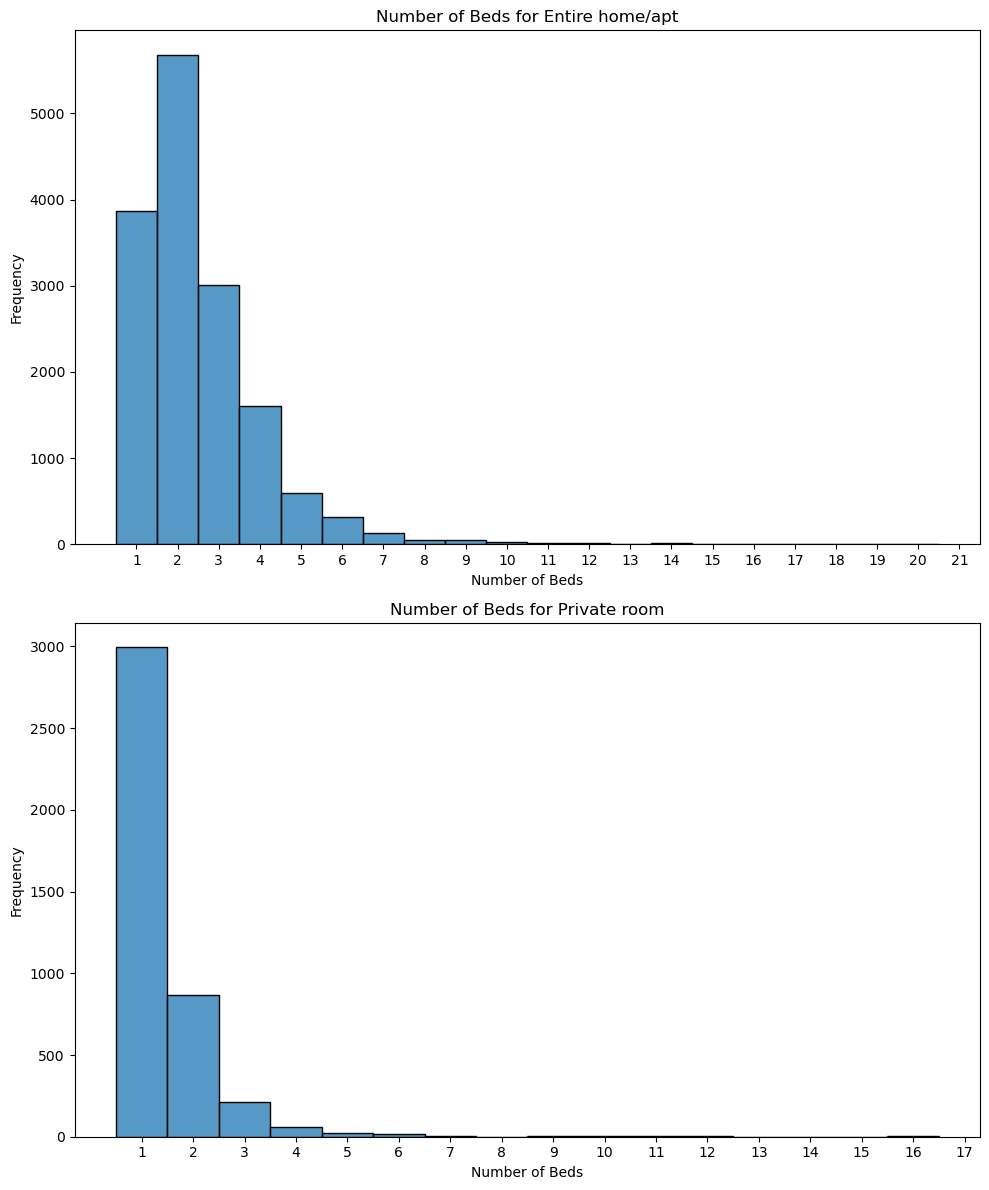

In [24]:
# To impute the nulls for beds we are going to go with the mode value from our dataset which based on the histograms below
# are 1 bed for private room and 2 beds for Home/Apt. For the purpose of this analysis this is very reasonable assumptions.

room_type_cat = rome_listings['room_type'].unique()

fig, axs = plt.subplots(len(room_type_cat), 1, figsize=(10, 6*len(room_type_cat)))

for i, room_type in enumerate(room_type_cat):
    data = rome_listings[rome_listings['room_type'] == room_type]['beds']
    bins = np.arange(data.min(), data.max() + 2) - 0.5  
    sns.histplot(data, ax=axs[i], kde=False, bins=bins)
    axs[i].set_title(f'Number of Beds for {room_type}')
    axs[i].set_xlabel('Number of Beds')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xticks(bins + 0.5)  

plt.tight_layout()
plt.show()

In [25]:
# Filling in nulls in the beds column

rome_listings.loc[rome_listings['room_type'] == 'Entire home/apt', 'beds'] = rome_listings.loc[rome_listings['room_type'] == 'Entire home/apt', 'beds'].fillna(2)
rome_listings.loc[rome_listings['room_type'] == 'Private room', 'beds'] = rome_listings.loc[rome_listings['room_type'] == 'Private room', 'beds'].fillna(1)

In [26]:
# Upon exploring the superhosts column below, we notice many are duplicated host_ids, as a results for this analysis we will
# manually check the hosts url and fill in the null values.

# Filter rows where 'superhost' is null
null_superhosts = rome_listings[rome_listings['host_is_superhost'].isnull()]

null_superhosts = null_superhosts['host_id'].value_counts()
null_superhosts

host_id
418088677    9
245357731    8
18126088     7
2023070      7
21325219     7
            ..
73304639     1
5345069      1
24648448     1
302110981    1
17231471     1
Name: count, Length: 64, dtype: int64

In [27]:
suphost_id_nums = [1667252, 2627059, 5114565, 5345069, 17231471, 18126088, 24648448, 26517989, 29287946, 33655481, 37671370, 48399502, 55556682, 96212987, 106936407, 130371299, 150556523, 218934654, 240142354, 251055084, 286264533, 403166691, 463568933, 490474131, 510338931, 536492183]

# Break off part of the dataset we want to manipulate
df2 = rome_listings[rome_listings['host_is_superhost'].isnull()].copy()

# Fill in 't' for rows where 'host_id' is in the list of host_ids
df2.loc[df2['host_id'].isin(suphost_id_nums), 'host_is_superhost'] = df2.loc[df2['host_id'].isin(suphost_id_nums), 'host_is_superhost'].fillna('t')

# Fill in 'f' for the rest of the rows in the dataframe
df2['host_is_superhost'].fillna('f', inplace=True)

# Drop the rows in the original dataFrame that we are going to replace 
rome_listings.drop(rome_listings[rome_listings['host_is_superhost'].isnull()].index, inplace=True)

# Add the manipulated dataframe back to the original
rome_listings = pd.concat([rome_listings, df2])

In [28]:
# Using the median price broken down by neighbourhood, room type and number of beds as my imputation method to fill in nulls
median_prices = rome_listings.groupby(['neighbourhood_cleansed', 'room_type', 'beds'])['price'].median()

pd.set_option('display.max_rows', None)
print(median_prices)


neighbourhood_cleansed      room_type        beds
I Centro Storico            Entire home/apt  1.0      101.0
                                             2.0      120.0
                                             3.0      152.0
                                             4.0      179.0
                                             5.0      216.0
                                             6.0      239.0
                                             7.0      296.5
                                             8.0      365.0
                                             9.0      374.0
                                             10.0     488.0
                                             11.0     514.5
                                             12.0     491.0
                                             13.0     510.0
                                             14.0     657.0
                                             15.0      95.5
                                             16.0 

In [29]:
# Fill in the null values by using the calculated median price for each group.
# Median prices are based on listings that are in the same neighbourhood, room type, and number of beds.

rome_listings['price'] = rome_listings.groupby(['neighbourhood_cleansed', 'room_type', 'beds'])['price'].transform(lambda x: x.fillna(x.median()))

In [30]:
rome_listings.isnull().sum()

id                                                0
listing_url                                       0
host_id                                           0
host_url                                          0
host_name                                         0
host_is_superhost                                 0
neighbourhood_cleansed                            0
latitude                                          0
longitude                                         0
room_type                                         0
accommodates                                      0
bathrooms_text                                    0
beds                                              0
price                                             3
minimum_nights                                    0
maximum_nights                                    0
has_availability                                226
availability_30                                   0
availability_60                                   0
availability

In [31]:
rome_listings[rome_listings['price'].isnull()]

,id,listing_url,host_id,host_url,host_name,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_listings_total,bathrooms,bathroom_type
2858,5998780.0,https://www.airbnb.com/rooms/5998780,31142839,https://www.airbnb.com/users/show/31142839,Malgorzata,f,VI Roma delle Torri,41.87235,12.65705,Private room,4,1 private bath,4.0,NaN,2,29,NaN,0,0,0,0,33,2,0,2023-06-25,4.27,4.45,4.67,4.64,4.61,3.73,4.36,t,3,0,3,0,0.32,2,1.0,Private
3771,8579249.0,https://www.airbnb.com/rooms/8579249,6233483,https://www.airbnb.com/users/show/6233483,Enrico,t,IV Tiburtina,41.91248,12.54556,Entire home/apt,14,4 baths,8.0,NaN,3,1125,NaN,0,0,0,0,20,4,0,2023-08-13,4.85,4.90,4.75,4.85,4.90,4.15,4.70,t,6,6,0,0,0.23,5,4.0,Private
11546,34854120.0,https://www.airbnb.com/rooms/34854120,159314188,https://www.airbnb.com/users/show/159314188,Roberta,t,VI Roma delle Torri,41.87554,12.65111,Private room,1,1 shared bath,6.0,NaN,6,90,NaN,0,0,0,0,1,1,0,2023-09-26,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t,2,0,2,0,0.37,2,1.0,Shared


In [32]:
# Assuming the three factors are 'neighbourhood', 'room_type', and 'beds'
grouped = rome_listings.groupby(['neighbourhood_cleansed', 'room_type', 'beds'])

# Count the unique listings in each group
unique_per_group = grouped['id'].nunique()

# Print the result
print(unique_per_group)


neighbourhood_cleansed      room_type        beds
I Centro Storico            Entire home/apt  1.0     2142
                                             2.0     3292
                                             3.0     1749
                                             4.0      923
                                             5.0      350
                                             6.0      203
                                             7.0       86
                                             8.0       28
                                             9.0       24
                                             10.0      18
                                             11.0      12
                                             12.0       5
                                             13.0       4
                                             14.0       3
                                             15.0       2
                                             16.0       2
                      

In [33]:
# Removing the last few rows containing nulls for simplicity as their group type is rare and listings are not currently
# available on the airbnb website.

# List of ids to drop
drop_ids = [957741461301357000, 5998780 , 34854120, 8579249]

# Keep only rows where the ids are not in the above list
rome_listings = rome_listings[~rome_listings['id'].isin(drop_ids)]

In [34]:
# Now that nulls are cleaned up, lets clean up the rest of the dataframe.
# First, the reset index post concatination

rome_listings = rome_listings.reset_index(drop=True)

In [35]:
# Round prices to nearest euro

rome_listings['price'] = rome_listings['price'].round()

In [36]:
# Convert is_superhost and instant_bookable to boolean

# Create a dictionary to map the boolean to correct string
bool_map = {'t': True, 'f': False}

# Convert columns to boolean
rome_listings['host_is_superhost'] = rome_listings['host_is_superhost'].map(bool_map)
rome_listings['instant_bookable'] = rome_listings['instant_bookable'].map(bool_map)

In [37]:
# drop bathrooms_text and has_availability columns

rome_listings = rome_listings.drop(['bathrooms_text','has_availability'], axis=1)

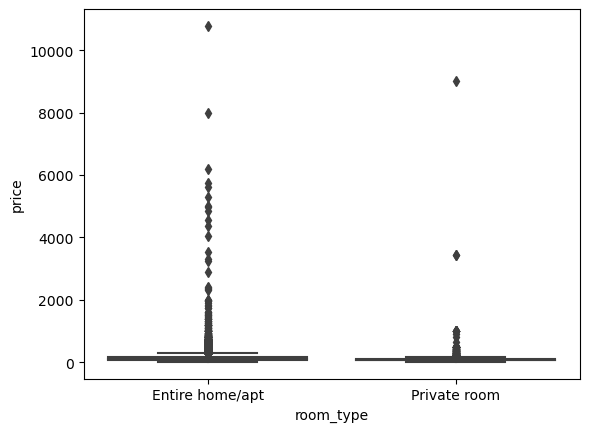

In [38]:
# Checking price outliers with a boxplot

sns.boxplot(x='room_type', y='price', data=rome_listings)
plt.show()

In [39]:
# Inspecting the private room outliers

rome_listings[(rome_listings['room_type'] == 'Private room') & (rome_listings['price'] > 3000)]

,id,listing_url,host_id,host_url,host_name,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_listings_total,bathrooms,bathroom_type
5080,2.211522e+07,https://www.airbnb.com/rooms/22115224,161564396,https://www.airbnb.com/users/show/161564396,Erica,True,II Parioli/Nomentano,41.919380,12.497270,Private room,2,1.0,9000.0,1,30,30,60,90,180,179,11,0,2023-10-30,4.84,4.88,4.85,4.92,4.89,4.80,4.75,True,1,0,1,0,2.51,1,1.0,Shared
14236,7.874670e+17,https://www.airbnb.com/rooms/787467278593033088,492267969,https://www.airbnb.com/users/show/492267969,Rossella,False,XIII Aurelia,41.894515,12.432436,Private room,2,2.0,3442.0,1,29,0,0,0,0,5,5,0,2023-10-03,4.20,4.00,4.20,4.00,4.40,3.60,3.40,True,3,0,3,0,0.59,2,1.0,Shared
14238,7.874840e+17,https://www.airbnb.com/rooms/787484325432035098,492267969,https://www.airbnb.com/users/show/492267969,Rossella,False,XIII Aurelia,41.894144,12.433563,Private room,2,1.0,3442.0,1,29,0,0,0,0,8,8,0,2023-10-17,4.63,4.50,4.75,4.88,4.88,4.63,4.38,True,3,0,3,0,0.93,2,1.0,Shared


In [40]:
# We cannot find valid listings for the above and so we will remove the above for the purpose of this analysis.

rome_listings = rome_listings[~((rome_listings['room_type'] == 'Private room') & (rome_listings['price'] > 3000))]

In [41]:
# Inspecting the entire home/apt outliers

rome_listings[(rome_listings['room_type'] == 'Entire home/apt') & (rome_listings['price'] > 2000)]

,id,listing_url,host_id,host_url,host_name,host_is_superhost,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_listings_total,bathrooms,bathroom_type
2038,6.268481e+06,https://www.airbnb.com/rooms/6268481,32477070,https://www.airbnb.com/users/show/32477070,Oriana Homèl,True,I Centro Storico,41.901990,12.480520,Entire home/apt,5,3.0,2881.0,1,1125,10,31,60,230,266,8,3,2023-12-07,4.85,4.90,4.88,4.93,4.92,4.98,4.79,True,8,8,0,0,2.54,8,1.0,Private
2039,6.268720e+06,https://www.airbnb.com/rooms/6268720,32477070,https://www.airbnb.com/users/show/32477070,Oriana Homèl,True,I Centro Storico,41.901990,12.480520,Entire home/apt,4,3.0,4971.0,1,1125,10,40,70,236,174,3,1,2023-11-27,4.79,4.81,4.88,4.93,4.92,4.98,4.72,True,8,8,0,0,1.67,8,1.0,Private
2366,7.891792e+06,https://www.airbnb.com/rooms/7891792,32477070,https://www.airbnb.com/users/show/32477070,Oriana Homèl,True,I Centro Storico,41.901990,12.480520,Entire home/apt,5,3.0,3543.0,1,1125,13,27,51,204,161,10,0,2023-11-12,4.77,4.80,4.86,4.85,4.89,4.94,4.69,True,8,8,0,0,1.65,8,1.0,Private
2367,7.891842e+06,https://www.airbnb.com/rooms/7891842,32477070,https://www.airbnb.com/users/show/32477070,Oriana Homèl,True,I Centro Storico,41.901760,12.480910,Entire home/apt,4,2.0,3244.0,1,1125,13,43,68,239,279,31,0,2023-11-13,4.76,4.78,4.80,4.84,4.96,4.99,4.75,True,8,8,0,0,2.76,8,1.0,Private
2769,1.006815e+07,https://www.airbnb.com/rooms/10068148,8536181,https://www.airbnb.com/users/show/8536181,Guglielmo,False,II Parioli/Nomentano,41.918760,12.495970,Entire home/apt,7,5.0,2321.0,2,200,29,59,89,364,6,3,0,2023-06-26,5.00,5.00,4.83,5.00,5.00,5.00,4.83,False,3,3,0,0,0.09,2,2.0,Private
4007,1.634296e+07,https://www.airbnb.com/rooms/16342959,6907336,https://www.airbnb.com/users/show/6907336,Valentina,True,I Centro Storico,41.908040,12.452940,Entire home/apt,2,1.0,10777.0,2,30,18,48,78,351,226,13,0,2023-09-30,4.89,4.91,4.84,4.91,4.96,4.93,4.83,False,1,1,0,0,2.67,1,1.0,Private
5507,2.421742e+07,https://www.airbnb.com/rooms/24217416,3988638,https://www.airbnb.com/users/show/3988638,Federico,True,IX Eur,41.775240,12.507290,Entire home/apt,16,18.0,2414.0,3,90,24,54,84,286,21,5,0,2023-09-23,5.00,4.95,4.95,5.00,5.00,4.90,5.00,False,1,1,0,0,0.32,1,9.5,Private
5518,2.425974e+07,https://www.airbnb.com/rooms/24259741,340212816,https://www.airbnb.com/users/show/340212816,B B Home,True,XII Monte Verde,41.871410,12.456460,Entire home/apt,4,2.0,2393.0,1,365,0,24,54,329,187,25,0,2023-11-11,4.75,4.80,4.72,4.96,4.99,4.54,4.63,True,18,18,0,0,2.71,17,1.0,Private
9271,4.698434e+07,https://www.airbnb.com/rooms/46984339,77127932,https://www.airbnb.com/users/show/77127932,Giuditta,True,I Centro Storico,41.905720,12.445910,Entire home/apt,4,2.0,4368.0,2,29,27,57,87,177,21,13,0,2023-10-27,5.00,5.00,5.00,4.95,5.00,4.81,4.90,True,3,3,0,0,1.01,2,1.0,Private
11598,5.964070e+17,https://www.airbnb.com/rooms/596407490396801317,452300663,https://www.airbnb.com/users/show/452300663,Giuseppe Alberto,True,I Centro Storico,41.904823,12.462314,Entire home/apt,5,3.0,2357.0,1,365,18,36,66,334,13,13,1,2023-11-19,5.00,5.00,5.00,5.00,5.00,5.00,5.00,True,1,1,0,0,1.42,1,1.0,Private


In [42]:
# Upon inspection of the apartments/homes with prices above 2k EUR per night, i have decided to remove them from this 
# analysis so simplicity. While they represent a very small proportion of the total dataset, the current rates on the website
# show high variance from what is recorded in the data. I propose the removal of these outliers will have minimal effect on 
# the median prices calculated earlier due to the spread over the groups.

rome_listings = rome_listings[~((rome_listings['room_type'] == 'Entire home/apt') & (rome_listings['price'] > 2000))]

In [43]:
rome_listings.shape

(19736, 39)

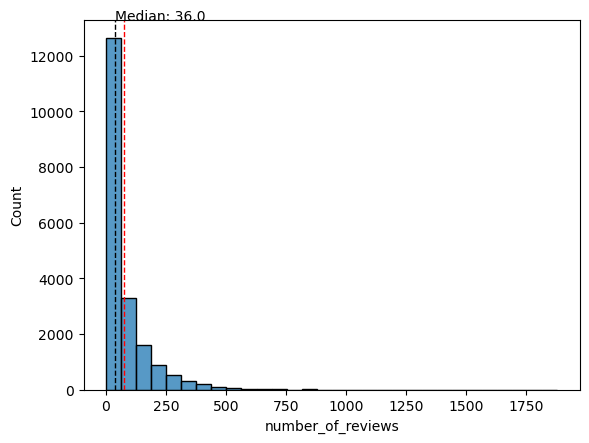

In [52]:
# Distribution of ratings count

# Create histogram
sns.histplot(rome_listings['number_of_reviews'], kde=False, bins=30)

# Calculate median
median = rome_listings['number_of_reviews'].median()

# Calculate median
mean = rome_listings['number_of_reviews'].mean()

# Add a vertical line at the median and mean
plt.axvline(median, color='k', linestyle='dashed', linewidth=1)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)

# Add a text label for the median and mean
plt.text(median+0.1, plt.gca().get_ylim()[1]-10, f'Median: {median}', color='k')
#plt.text(mean+0.1, plt.gca().get_ylim()[1]-10, f'Mean: {mean}', color='red')

# Show the plot
plt.show()

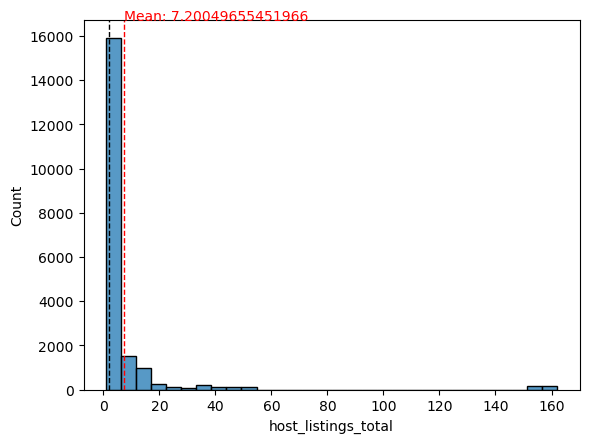

In [55]:
# Distribution for number of listings per host

# Create histogram
sns.histplot(rome_listings['host_listings_total'], kde=False, bins=30)

# Calculate median
median = rome_listings['host_listings_total'].median()

# Calculate median
mean = rome_listings['host_listings_total'].mean()

# Add a vertical line at the median and mean
plt.axvline(median, color='k', linestyle='dashed', linewidth=1)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)

# Add a text label for the median and mean
#plt.text(median+0.1, plt.gca().get_ylim()[1]-10, f'Median: {median}', color='k')
plt.text(mean+0.1, plt.gca().get_ylim()[1]-10, f'Mean: {mean}', color='red')

# Show the plot
plt.show()

In [44]:
# Save the cleaned dataframe as new csv

#rome_listings.to_csv('RomeListings.csv')